In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

#read in excel raw data
fname = "/Users/leemc/Documents/GitHub/blood-vessel-diameter/Data/120pointsNormalized_YM + THA.xls"
bv_df = pd.read_excel(fname)

#create column names and time labels
#Need to make sure that names+time labels are the same width as dataframe
labels = ['File loc', 'File name', 'Stim frame', 'Frame rate', 'Threshold method', 'Ave. baseline']
x = len(bv_df.columns)
time = list(range(-3,x-9))
col_labels = labels + time
bv_df.columns = col_labels

#create smaller dataframe with data to graph
bv_reduced = bv_df.drop(columns=['File loc', 'Stim frame', 'Frame rate', 'Threshold method', 'Ave. baseline'])
#bv_reduced['File name']
#print (bv_reduced)

In [3]:
#iterate through the file names and extract the pulse
pulse = []
line = []
for f in bv_reduced['File name']:
    p = re.findall('^[0-9]*_[0-9]*[a-z]*', f)
    p_to_str = ''.join(map(str, p))
    pulse.append(p_to_str)
    #print(p)
    l = f[-5]
    line.append(l)
bv_reduced['Pulse'] = pulse
bv_reduced['Line'] = line
#bv_reduced
#set pulse and file name as the hierarchical index
bv_reduced.set_index('Pulse', inplace=True)
bv_time = bv_reduced.drop(columns = ['File name', 'Line']).transpose()
bv_time = bv_reduced.drop(columns = 'File name')
pd.options.display.max_rows = 500
#bv_time.head()
bv_time
#bv_time.index.unique()

,-3,-2,-1,0,1,2,3,4,5,6,...,97,98,99,100,101,102,103,104,105,Line
Pulse,,,,,,,,,,,,,,,,,,,,,
031418_12,0.066275,0.024545,-0.096983,-0.349011,-0.544027,-0.478294,-0.460182,-0.515967,-0.396045,-0.193917,...,0.328167,0.331908,0.296989,0.234634,0.208445,0.186828,0.167825,0.143773,0.083111,1
031418_12,0.043011,0.003722,-0.048387,-0.174194,-0.245968,-0.220430,-0.211982,-0.239919,-0.202765,-0.092375,...,0.209677,0.209677,0.177419,0.161290,0.129032,0.112903,0.096774,0.092166,0.062903,2
031418_12,0.040850,0.007709,-0.051693,-0.115468,-0.199346,-0.173082,-0.163399,-0.180283,-0.128540,-0.073876,...,0.143791,0.137691,0.128540,0.123457,0.107190,0.094650,0.061002,0.050109,0.035512,3
031418_12,0.029019,0.009487,-0.040230,-0.055174,-0.143041,-0.122439,-0.114166,-0.148053,-0.110347,-0.046305,...,0.015655,0.015655,0.002291,-0.011073,-0.003055,-0.006618,-0.024437,-0.026346,-0.041810,4
031418_12,0.041397,0.014695,-0.058764,-0.098965,-0.128396,-0.106176,-0.120310,-0.134056,-0.120310,-0.065624,...,0.071583,0.077620,0.086675,0.081644,0.071583,0.066552,0.056490,0.041397,0.026304,5
031418_12,0.011931,0.010946,-0.026031,-0.022398,-0.048913,-0.021373,-0.036012,-0.035463,-0.057971,-0.028826,...,0.014493,0.029864,0.029864,0.019616,0.020641,0.016201,0.018884,0.007905,-0.002415,6
031418_12,0.008026,0.005484,-0.014508,-0.020066,-0.041549,-0.025024,-0.034466,-0.041549,-0.041549,-0.010001,...,0.008026,0.014636,0.030060,0.024551,0.031161,0.024551,0.017469,0.008026,0.006374,7
031418_12,0.010136,0.009928,-0.022115,-0.015320,-0.037256,-0.035902,-0.036676,-0.033194,-0.041318,-0.019161,...,0.007428,0.023677,0.023677,0.007428,0.023677,0.023677,0.023677,0.021356,0.010678,8
031418_13,0.027669,-0.011515,-0.026892,-0.070570,-0.118479,-0.125665,-0.178707,-0.152852,-0.178707,-0.212928,...,-0.121217,-0.199240,-0.186920,-0.209506,-0.170494,-0.230038,-0.233460,NaN,NaN,1


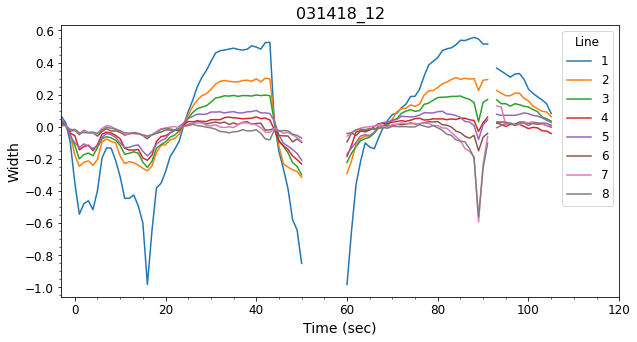

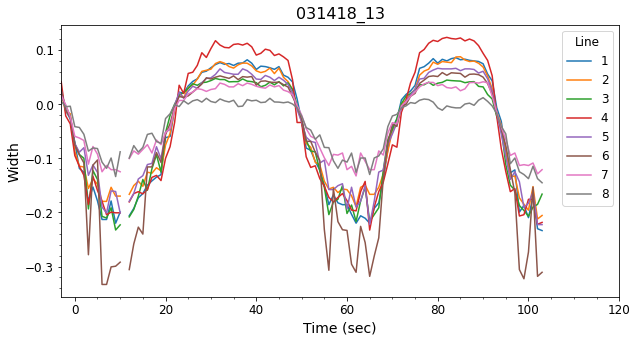

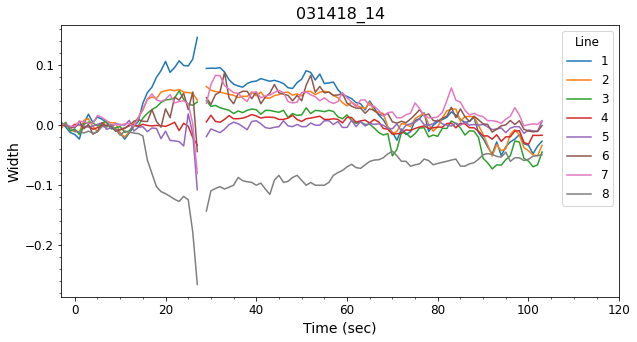

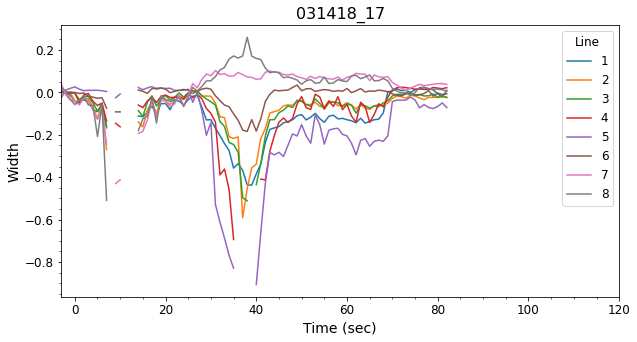

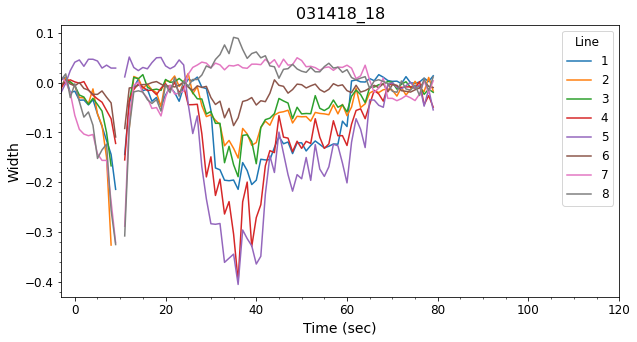

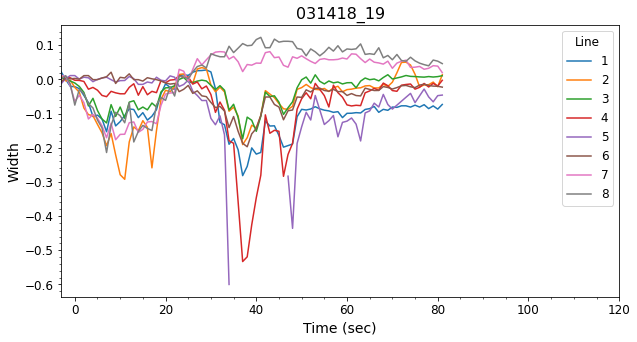

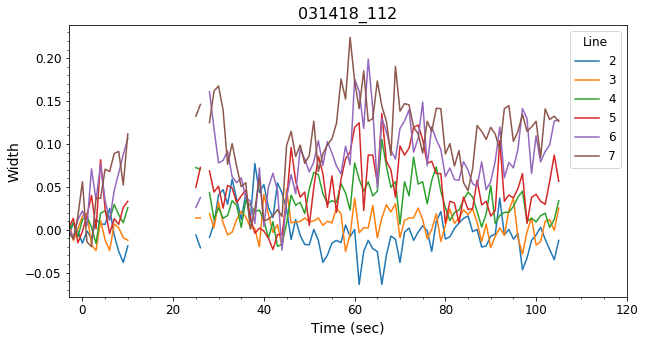

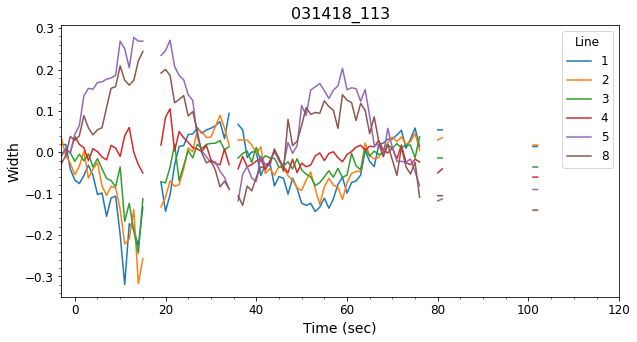

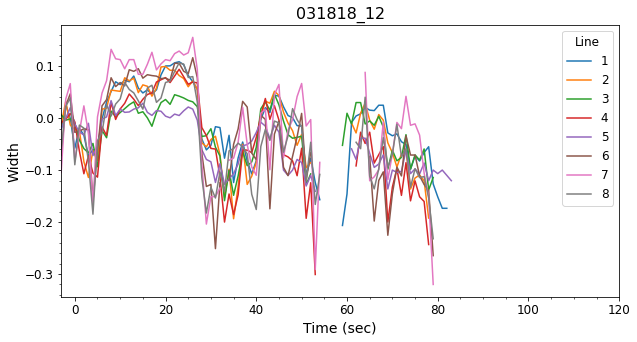

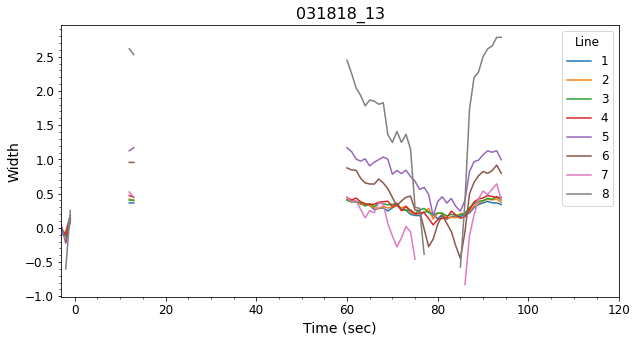

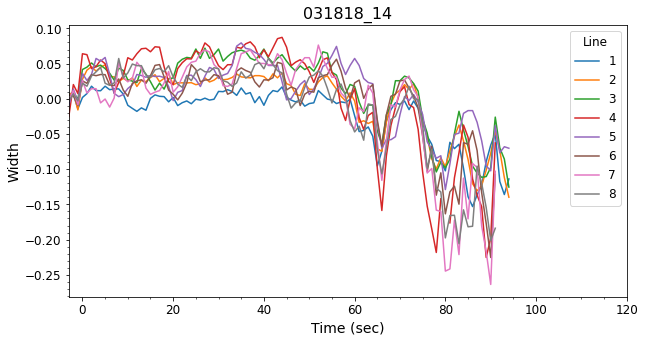

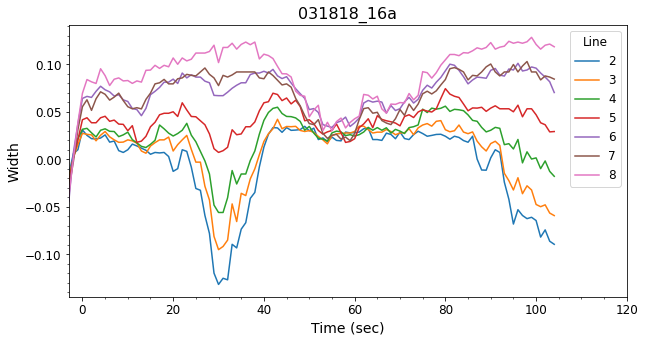

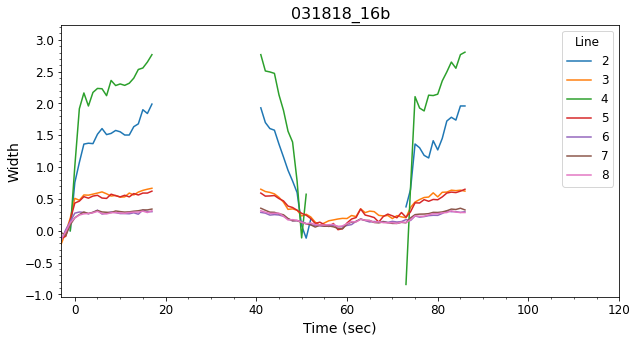

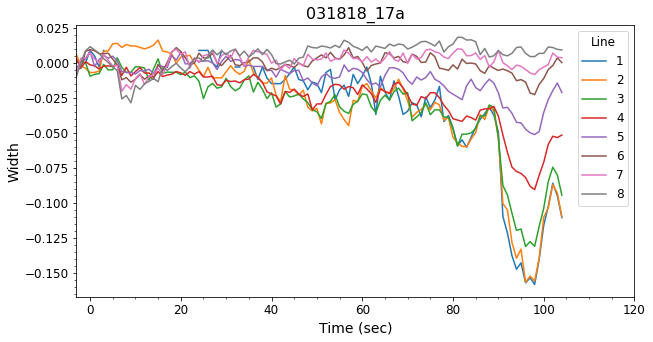

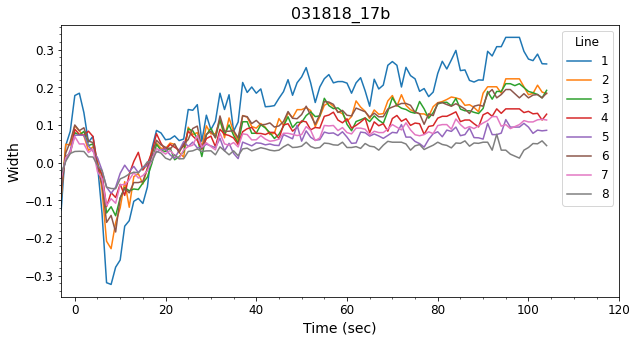

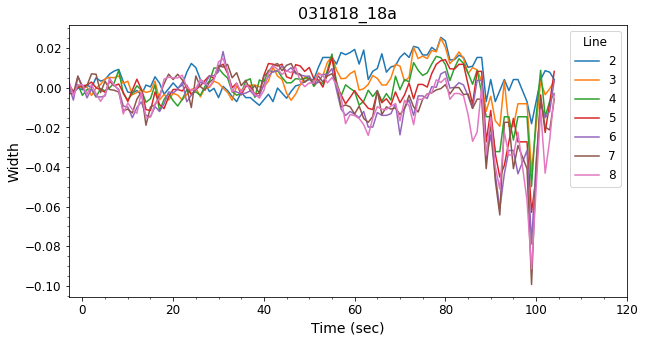

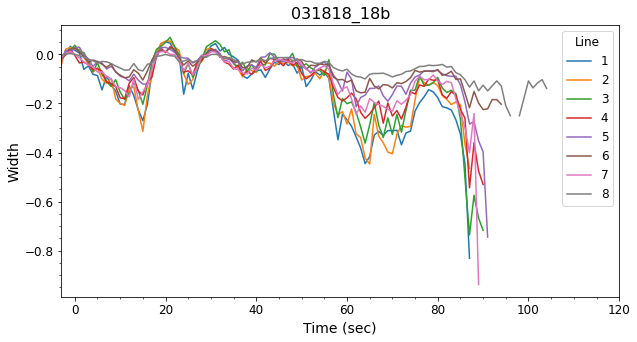

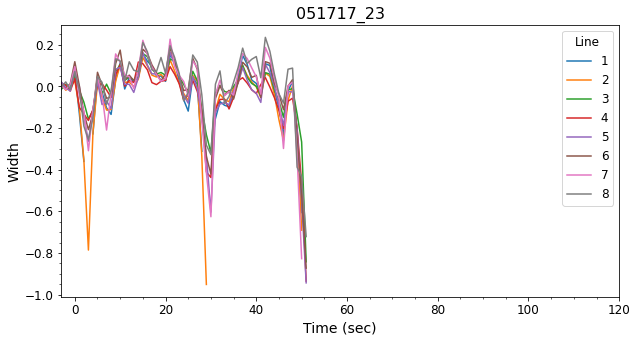

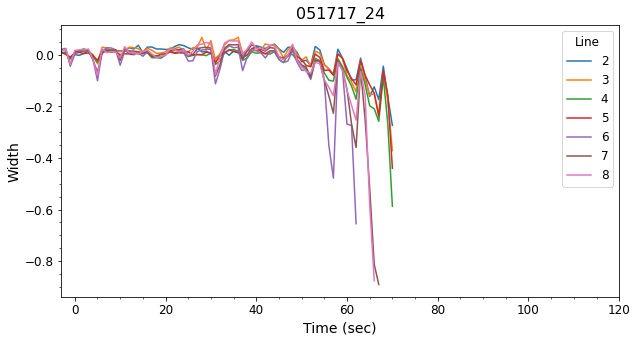

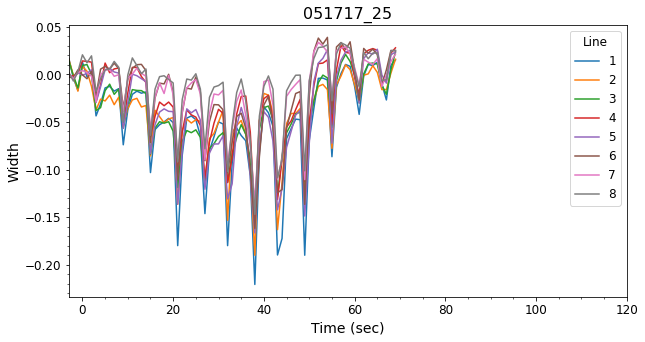

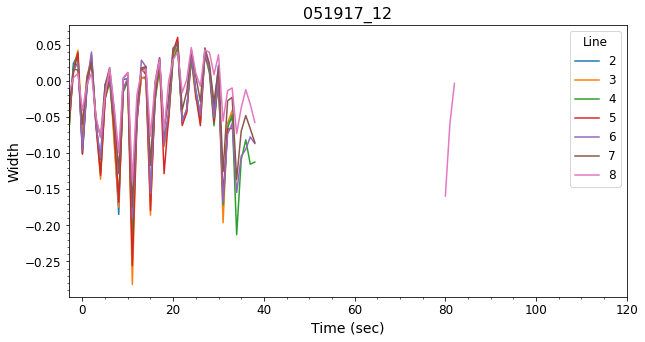

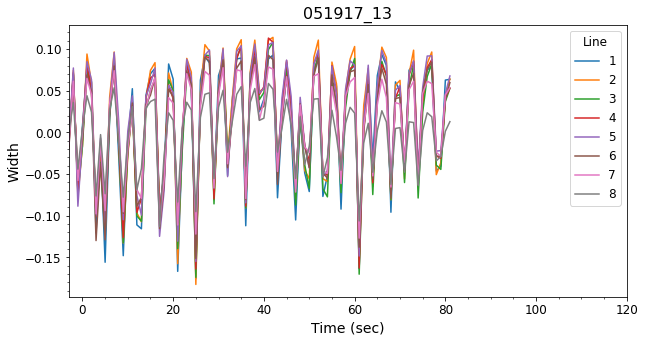

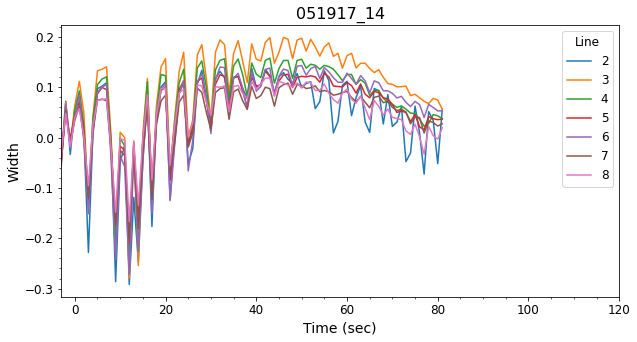

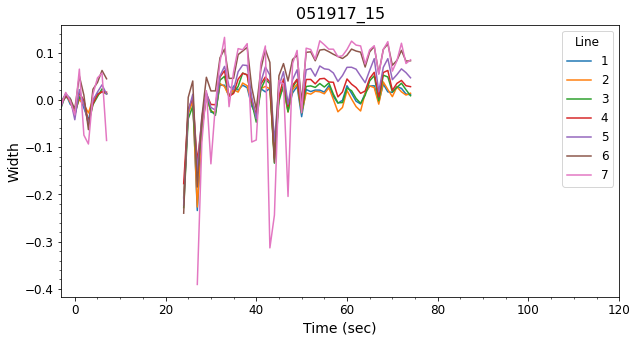

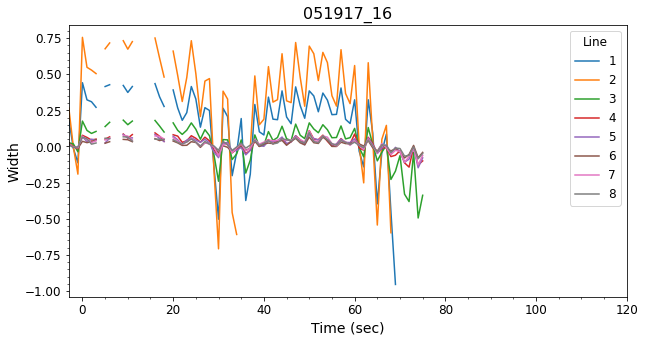

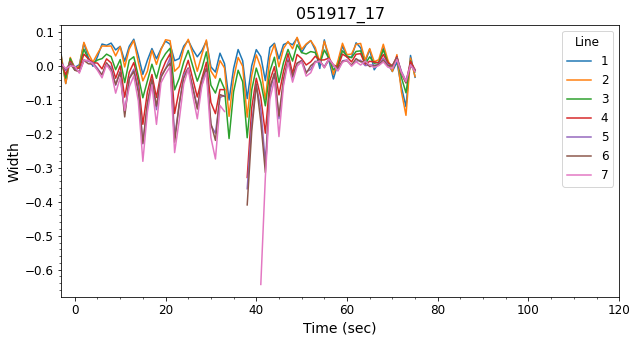

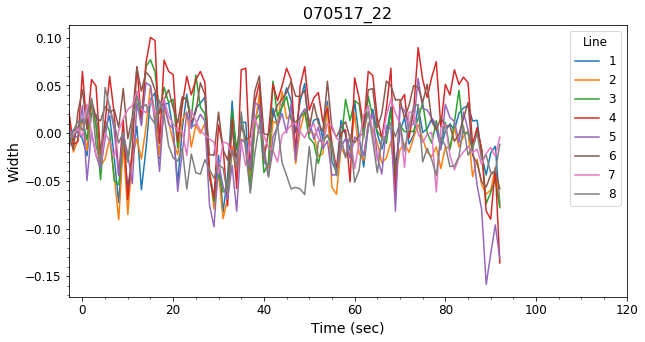

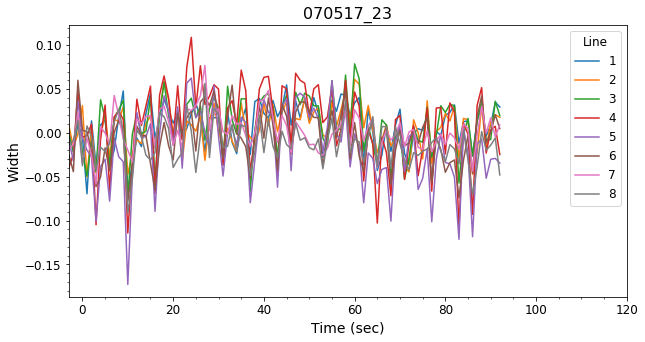

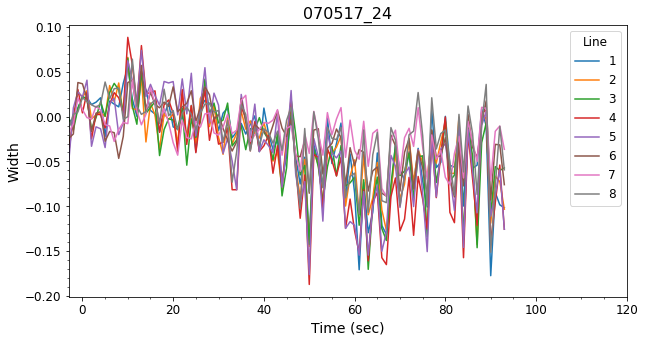

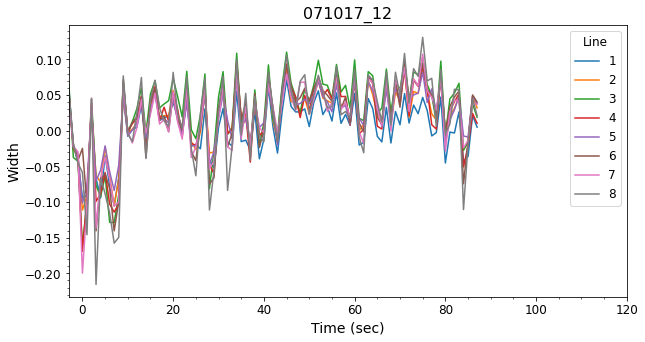

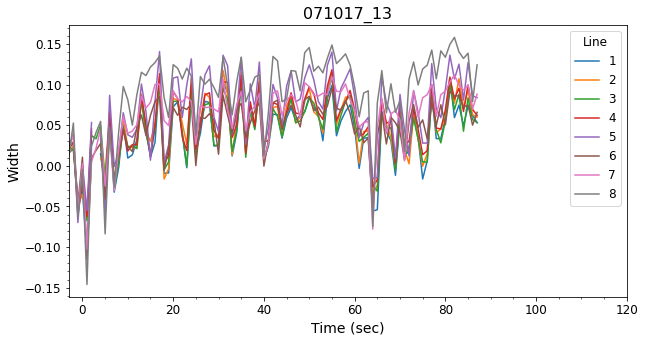

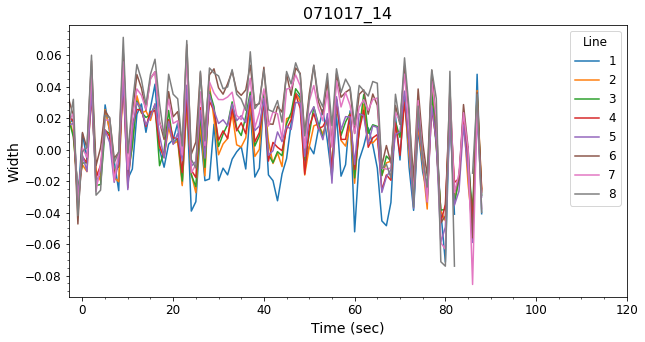

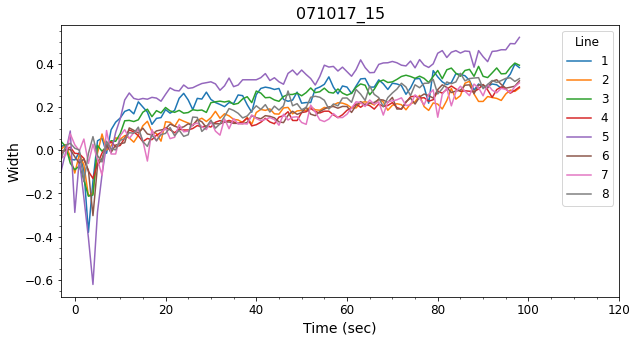

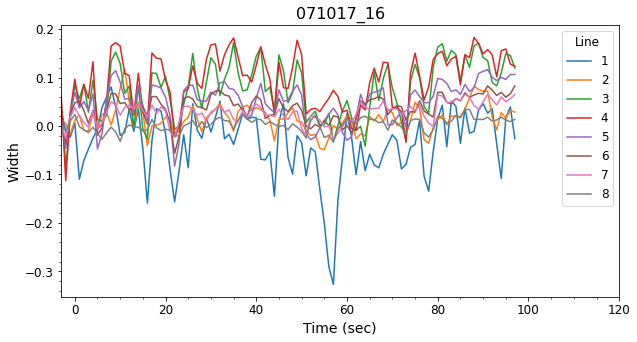

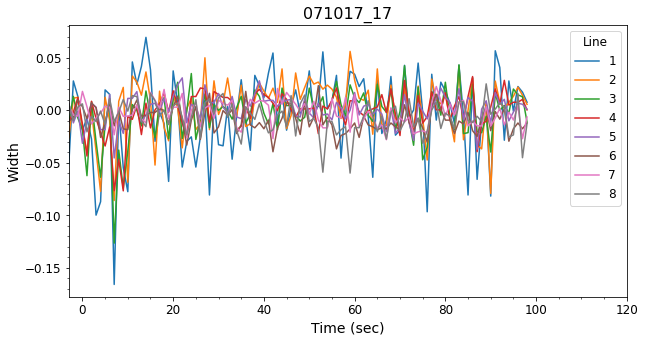

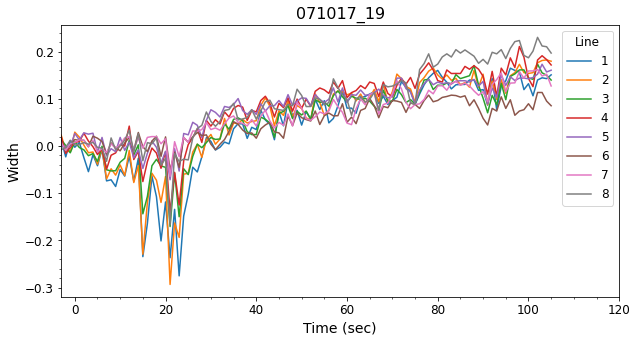

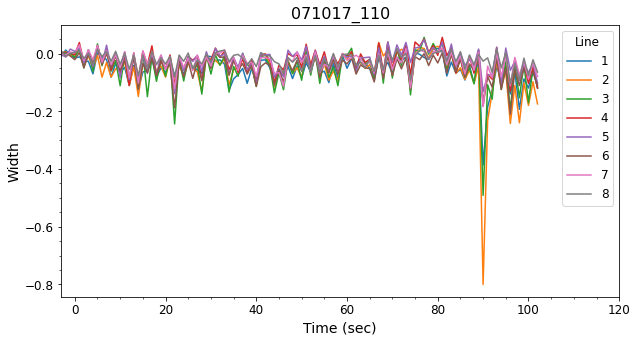

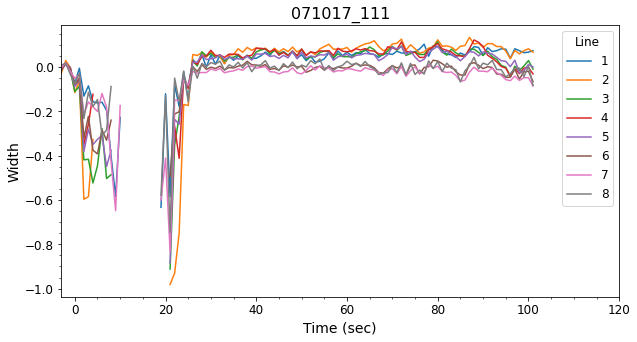

In [4]:
pulses = bv_time.index.unique()
for p in pulses:
    bv_subset = bv_time.loc[p]
    bv_subset.set_index('Line', inplace=True)
    bv_subset_trans = bv_subset.transpose()
    #print(bv_subset_trans)
    # plot
    bv_subset_trans.plot(figsize=(10,5), xlim=(-3,120), fontsize=12)
    plt.legend(fontsize='large', title='Line', title_fontsize=12)
    plt.title(label=p, fontsize=16)
    plt.minorticks_on()
    plt.xlabel('Time (sec)', fontsize=14)
    plt.ylabel('Width', fontsize=14)
    figname = p + '.png'
    plt.savefig(figname)
    #print(figname)
    plt.show() 